# Guide to make_plot.py

make_plot.py is a tool for gravitational wave analysis. It was originally designed for the LISA gravitational wave mission, but has broad applications. It provides a gridded array of plots for comparisons of sensitivity curves and/or binary parameters. This guide will walk you through the uses of this code, including using varying inputs for different outputs. Therefore, included here is information on how to create the configuration file (make_plot_config.json). For specific information on the code structure, classes used, and class and function inputs, please refer to the code documentation by using the python function help(make_plot). Please refer to and cite (###ADD SUBMITTED LINK HERE ###) for this usage of this tool and an example of its application. 

## Generic Inputs

make_plot.py takes as an input, a gridded data set with columns representing the x values, y values, and z values. For this particular application, and throughout the guide, the x value will be the signal-to-noise ratio (SNR), but the tool itself is generic to whatever z value the user prefers. 

This input can take the form of a file (like the output from generate_contour_data.py), or can be in the form a dict within a code or notebook. In this guide, I will use both to show booth options. The main difference is json has lower case true and false for boolean, while python has True and False. 

## Basic Outputs

In this section I will describe the three basic types of plots this tool can produce. To do this, I will import the code and create my own dict in this notebook containing desired inputs. The dict will exactly resemble what can be assembled using a json file besides the boolean capitalization. 

In [1]:
from make_plot import plot_main
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

## Waterfall Plot

The waterfall plot is a general filled contour plot. You can define values for the contours, but there are default values shown in the plot below. These plots resemble figure 3 in the LISA Mission Proposal.

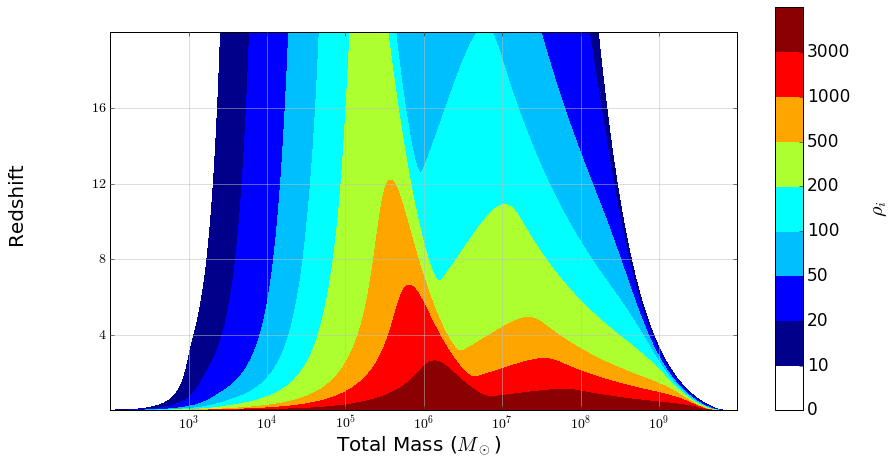

In [4]:
waterfall_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,

    "num_rows": 1,
    "num_cols": 1,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",

    "fig_y_label": "Redshift",
    "fig_x_label": "Total Mass ($M_\odot$)",
        
    "file_name":"q5_s65.hdf5"
    },



"plot_info":
    {

    "0":{
        "file":[
            {"label":"Classic_LISA_wd_all"}
            ],
        "type": "Waterfall"
        }
    }
}

plot_main(waterfall_dict)

### Edit the Plot in Python

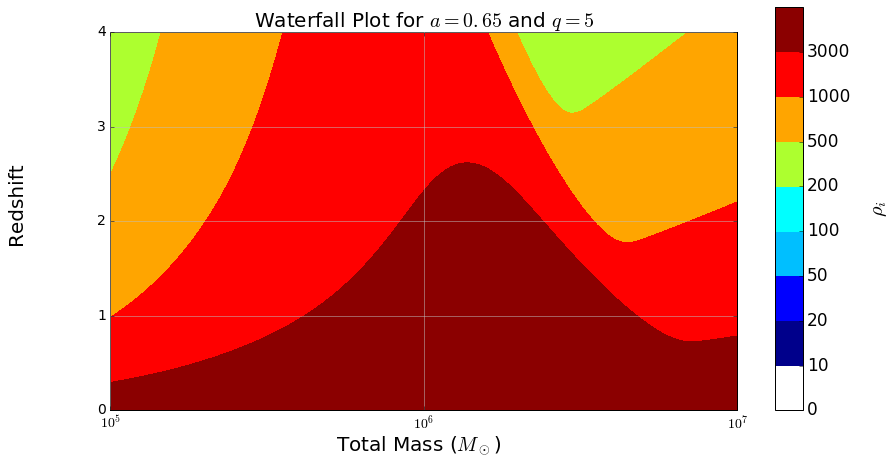

In [35]:
fig, ax = plot_main(waterfall_dict, return_fig_ax=True)
ax[0].set_title('Waterfall Plot for $a=0.65$ and $q=5$', fontsize=20)
ax[0].set_xlim(5,7)
ax[0].set_ylim(0,4)
ax[0].set_yticks([0,1,2,3,4])
ax[0].set_yticklabels([0,1,2,3,4])

## Ratio Difference and Loss/Gain Contours

Ratio difference plots show the log10 of the ratio of the SNR from one dataset to another.

$\log_{10}{\frac{\rho_1}{\rho_2}}$

The first dataset is inputed as the file ($\rho_1$). It is then compared against the "control" ($\rho_2$). The loss (gain) contours refer to sources from the first dataset with an SNR above (below) a certain value, while the second dataset has an SNR below (above) that same value. This value can be set as the "SNR_CUT" global variable, or specifically for the plot of interest with the "snr_contour_value" option. Filled grey contour lines indicate gained sources while dashed lines indicate lost sources.

/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:503: RuntimeWarning: invalid value encountered in less
  inds_gained = np.where((zout>=comparison_value) & (control_zout< comparison_value))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:504: RuntimeWarning: invalid value encountered in greater_equal
  inds_lost = np.where((zout<comparison_value) & (control_zout>=comparison_value))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:507: RuntimeWarning: invalid value encountered in less
  inds_rid = np.where((zout<1.0) & (control_zout<1.0))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:516: RuntimeWarning: invalid value encountered in greater_equal
  diff = np.log10(diff)*(diff >= 1.05) + (-np.log10(1.0/diff))*(diff<=0.952) + 0.0*((diff<1.05) & (diff>0.952))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:516: RuntimeWarning: invalid value encountered in less_equal
  dif

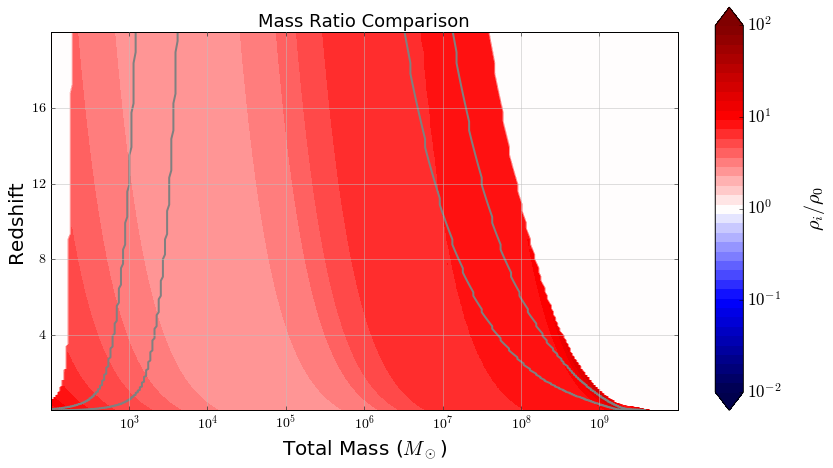

In [11]:
ratio_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,

    "num_rows": 1,
    "num_cols": 1,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"q5_s65.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Ratio",
        "control":
            {"name":"q50_s65.hdf5",
             "label":"LISA_prop_curve_all"},
        "label":
            {"title": "Mass Ratio Comparison", 
             "title_fontsize": 18,  "xlabel": r"Total Mass ($M_\odot$)", 
             "ylabel": "Redshift"},
        }
    }
}


plot_main(ratio_dict)

## Horizon Plot

Horizon plots are helpful for comparing more than two parameters. They show contour lines at either "SNR_CUT" or a specified value. 

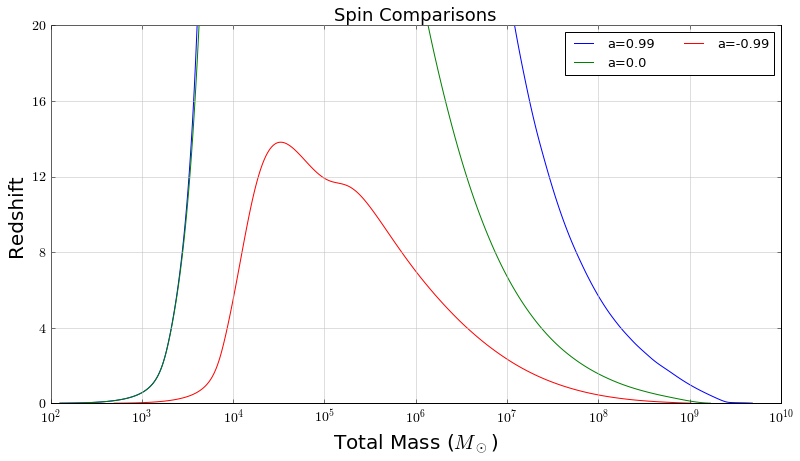

In [12]:
horizon_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,
    "spacing": "wide",

    "num_rows": 1,
    "num_cols": 1,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"q50_s99.hdf5",
             "label":"LISA_prop_curve_all"},
            {"name":"q50_s0.hdf5",
             "label":"LISA_prop_curve_all"},
            {"name":"q500_sn99.hdf5",
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Horizon",
        "label":
            {"title": "Spin Comparisons", 
             "title_fontsize": 18,  "xlabel": r"Total Mass ($M_\odot$)", 
             "ylabel": "Redshift"},

        
        "legend":
            {
            "labels": ["a=0.99", "a=0.0", "a=-0.99"],
            "loc": "upper right",
            "size":13,
            "ncol": 2
            },
        }
    }
}


plot_main(horizon_dict)

## Example 1: Comparison of Sensitivity Curves to Base Curve

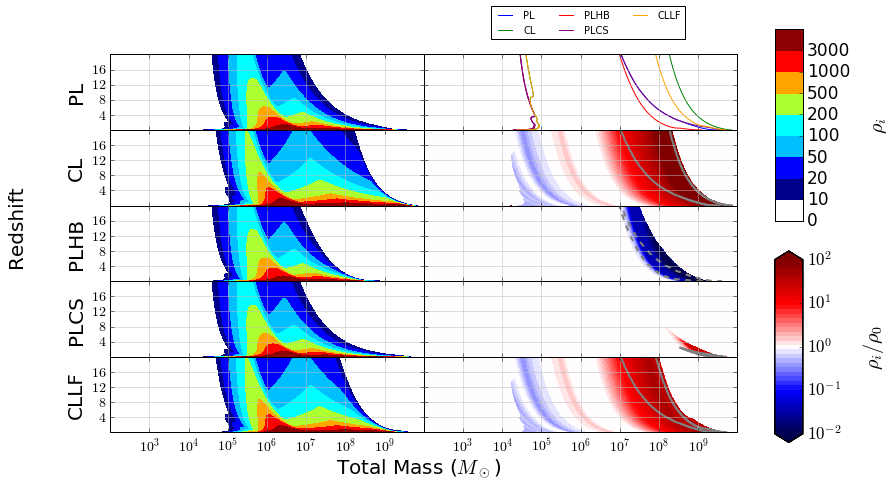

In [28]:
example_1_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,
        
    "x_column_label": "M_s",
    "y_column_label": "z",
        
    "file_name":"q5_s65.hdf5",

    "figure_width": 13.0,
    "figure_height": 7.0,
    "spacing": "tight",
    "fig_y_label": "Redshift",
    "fig_x_label": r"Total Mass ($M_\odot$)",

    "num_rows": 5,
    "num_cols": 2,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {

    "0":{
        "file":[
            {"label":"LISA_prop_curve_wd_rd"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL"}
        },
        
    "1":{
        "indices": [0, 2, 4, 6, 8],
        "type": "Horizon",
        "legend":
            {
            "labels": ["PL", "CL", "PLHB", "PLCS", "CLLF"],
            "bbox_to_anchor": [0.2,1.7],
            "size":10,
            "ncol": 3
            }
        },
        
    "2":{
        "file":[
            {"label":"Classic_LISA_wd_rd"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL"}
        },
    "3":{
        "indices": 2,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "4":{
        "file":[
            {"label":"LISA_prop_curve_early_break_wd_rd"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PLHB"}
        },
    "5":{
        "indices": 4,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "6":{
        "file":[
            {"label":"LISA_prop_curve_less_steep_wd_rd"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PLCS"}
        },
    "7":{
        "indices": 6,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "8":{
        "file":[
            {"label":"Classic_LISA_prop_behavior_wd_rd"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CLLF"}
        },
    "9":{
        "indices": 8,
        "control":
            {"index": 0},
        "type": "Ratio",
        }
    }
}


plot_main(example_1_dict)

## Example 2: Comparing Multiple Curves to Each Other

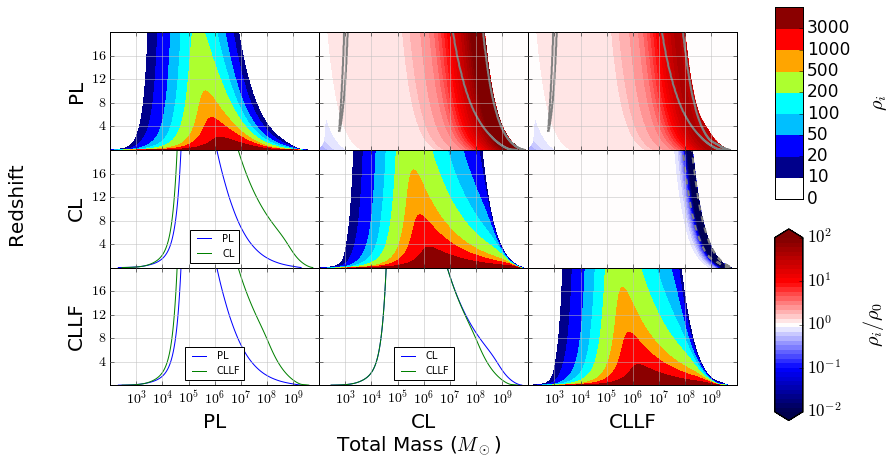

In [30]:
example_2_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "file_name": "q5_s65.hdf5",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,
    "spacing": "tight",
    "adjust_figure_bottom": 0.15,
    "fig_y_label": "Redshift",
    "fig_x_label": r"Total Mass ($M_\odot$)",

    "num_rows": 3,
    "num_cols": 3,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {
    #set diagonals
    "0":{
        "file":[
            {"label":"LISA_prop_curve_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL"}
        },
        
    "4":{
        "file":[
            {"label":"Classic_LISA_all"}
            ],
        "type": "Waterfall",
        },
    "8":{
        "file":[
            {"label":"Classic_LISA_prop_behavior_all"}
            ],
        "type": "Waterfall",
        "label":
            {"xlabel": "CLLF"}
        },
    #set upper diagonals - ratio
    "1":{
        "indices": 4,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "2":{
        "indices": 8,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "5":{
        "indices": 8,
        "control":
            {"index": 4},
        "type": "Ratio",
        },
    #set lower diagonals - horizon
    "3":{
        "indices": [0,4],
        "type": "Horizon",
        "label":
            {"ylabel": "CL"},
        "legend":
            {
            "labels": ["PL", "CL"],
            "loc": "lower center",
            "size":10,
            "ncol": 1
            },
        "extra":
            {
            "snr_contour_value":1e2    
            }
        },
    "6":{
        "indices": [0,8],
        "type": "Horizon",
        "label":
            {"xlabel": "PL", "ylabel": "CLLF"},
        "legend":
            {
            "labels": ["PL", "CLLF"],
            "loc": "lower center",
            "size":10,
            "ncol": 1
            },
        "extra":
            {
            "snr_contour_value":1e2    
            }
        },
    "7":{
        "indices": [4,8],
        "type": "Horizon",
        "label":
            {"xlabel":"CL"},
        "legend":
            {
            "labels": ["CL", "CLLF"],
            "loc": "lower center",
            "size":10,
            "ncol": 1
            },
        "extra":
            {
            "snr_contour_value":1e2    
            }
        }
    }
}



plot_main(example_2_dict)

## Example 3: Comparison Across Parameters

/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:503: RuntimeWarning: invalid value encountered in less
  inds_gained = np.where((zout>=comparison_value) & (control_zout< comparison_value))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:504: RuntimeWarning: invalid value encountered in greater_equal
  inds_lost = np.where((zout<comparison_value) & (control_zout>=comparison_value))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:507: RuntimeWarning: invalid value encountered in less
  inds_rid = np.where((zout<1.0) & (control_zout<1.0))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:516: RuntimeWarning: invalid value encountered in greater_equal
  diff = np.log10(diff)*(diff >= 1.05) + (-np.log10(1.0/diff))*(diff<=0.952) + 0.0*((diff<1.05) & (diff>0.952))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:516: RuntimeWarning: invalid value encountered in less_equal
  dif

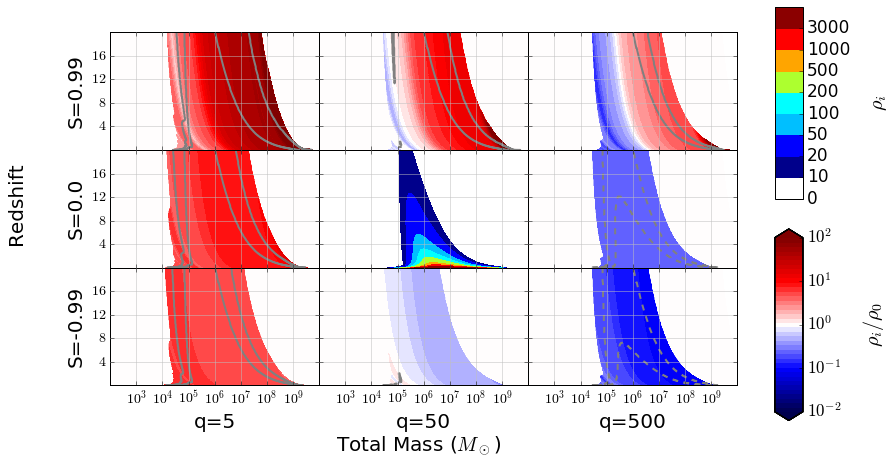

In [32]:
example_3_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,
    "spacing": "tight",
    "adjust_figure_bottom": 0.15,
    "fig_y_label": "Redshift",
    "fig_x_label": r"Total Mass ($M_\odot$)",

    "num_rows": 3,
    "num_cols": 3,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {
    #set diagonals
    "0":{
        "file":[
            {"name":"q5_s99.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
        "label":
            {"ylabel": "S=0.99"}
        },
    "1":{
        "file":[
            {"name":"q50_s99.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
        },
    "2":{
        "file":[
            {"name":"q500_s99.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
        },
    "3":{
        "file":[
            {"name":"q5_s0.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
        "label":
            {"ylabel": "S=0.0"}
        },
    "4":{
        "file":[
            {"name":"q50_s0.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "type": "Waterfall",
        },
    "5":{
        "file":[
            {"name":"q500_s0.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
        },
    "6":{
        "file":[
            {"name":"q5_sn99.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
         "label":
            {"ylabel": "S=-0.99", "xlabel":"q=5"}
        },
    "7":{
        "file":[
            {"name":"q50_sn99.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
        "label":
            {"xlabel": "q=50"}
        },
    "8":{
        "file":[
            {"name":"q500_sn99.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 4},
        "type": "Ratio",
        "label":
            {"xlabel": "q=500"}
        } 
    }
}



plot_main(example_3_dict)

/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:510: RuntimeWarning: invalid value encountered in true_divide
  diff = zout/control_zout
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:516: RuntimeWarning: invalid value encountered in greater_equal
  diff = np.log10(diff)*(diff >= 1.05) + (-np.log10(1.0/diff))*(diff<=0.952) + 0.0*((diff<1.05) & (diff>0.952))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:516: RuntimeWarning: invalid value encountered in less_equal
  diff = np.log10(diff)*(diff >= 1.05) + (-np.log10(1.0/diff))*(diff<=0.952) + 0.0*((diff<1.05) & (diff>0.952))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:516: RuntimeWarning: invalid value encountered in less
  diff = np.log10(diff)*(diff >= 1.05) + (-np.log10(1.0/diff))*(diff<=0.952) + 0.0*((diff<1.05) & (diff>0.952))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:516: RuntimeWarning: invalid value 

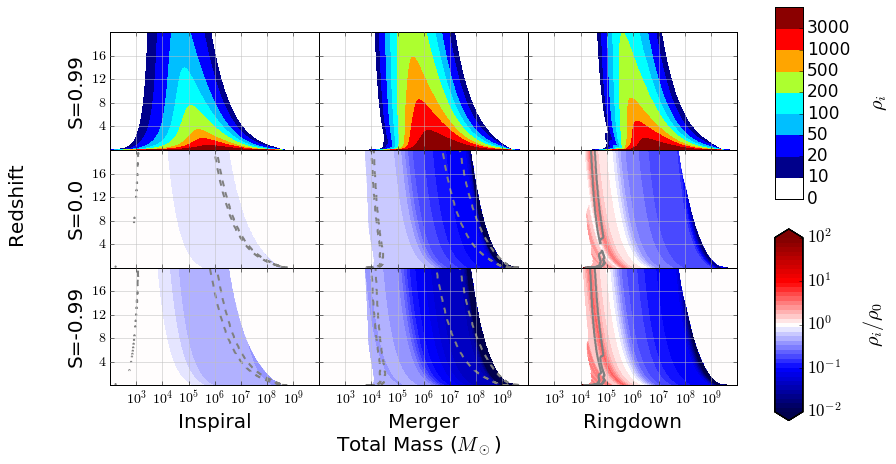

In [34]:
example_4_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,
    "spacing": "tight",
    "adjust_figure_bottom": 0.15,
    "fig_y_label": "Redshift",
    "fig_x_label": r"Total Mass ($M_\odot$)",

    "num_rows": 3,
    "num_cols": 3,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {
    #set diagonals
    "0":{
        "file":[
            {"name":"q5_s99.hdf5",
             "label":"LISA_prop_curve_ins"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "S=0.99"}
        },
    "1":{
        "file":[
            {"name":"q5_s99.hdf5",
             "label":"LISA_prop_curve_mrg"}
            ],
        "type": "Waterfall",
        },
    "2":{
        "file":[
            {"name":"q5_s99.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "type": "Waterfall",
        },
    "3":{
        "file":[
            {"name":"q5_s0.hdf5",
             "label":"LISA_prop_curve_ins"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
        "label":
            {"ylabel": "S=0.0"}
        },
    "4":{
        "file":[
            {"name":"q5_s0.hdf5",
             "label":"LISA_prop_curve_mrg"}
            ],
        "control":
            {"index":1},
        "type": "Ratio",
        },
    "5":{
        "file":[
            {"name":"q5_s0.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 2},
        "type": "Ratio",
        },
    "6":{
        "file":[
            {"name":"q5_sn99.hdf5",
             "label":"LISA_prop_curve_ins"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
         "label":
            {"ylabel": "S=-0.99", "xlabel":"Inspiral"}
        },
    "7":{
        "file":[
            {"name":"q5_sn99.hdf5",
             "label":"LISA_prop_curve_mrg"}
            ],
        "control":
            {"index": 1},
        "type": "Ratio",
        "label":
            {"xlabel": "Merger"}
        },
    "8":{
        "file":[
            {"name":"q5_sn99.hdf5",
             "label":"LISA_prop_curve_rd"}
            ],
        "control":
            {"index": 2},
        "type": "Ratio",
        "label":
            {"xlabel": "Ringdown"}
        } 
    }
}


plot_main(example_4_dict)